In [4]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

In [62]:
img = cv2.imread('mandril.jpg')
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Obtiene contornos con el operador de Canny
#Parámetros: imagen de entrada, umbral inferior, umbral superior
canny = cv2.Canny(gris, 100, 200)

Tarea 1:  Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

Número máximo de píxeles blancos en una fila: 56100
Número de filas con al menos el 90% de píxeles blancos: 7
Y sus positciones correspondientes son [6, 12, 15, 20, 21, 88, 100]


(0.0, 512.0)

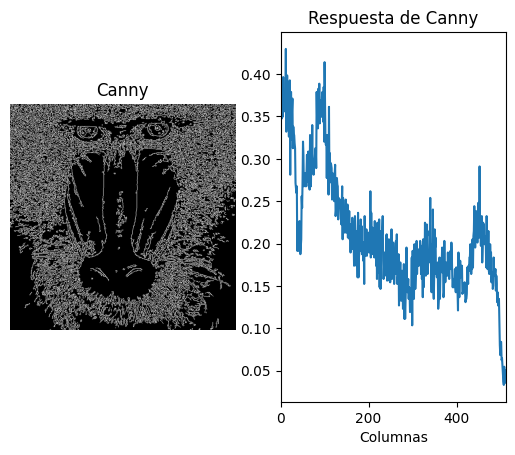

In [63]:
#El contenido de la imagen resultado de Canny, son valores 0 o 255, lo compruebas al descomentar
#print(canny)
#Cuenta el número de píxeles blancos (255) por fila
#Suma los valores de los pixeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts = row_counts.transpose()

bigger_col_with_border = np.max(row_counts[0])
print("Número máximo de píxeles blancos en una fila:", bigger_col_with_border)

treshold = 0.9 * bigger_col_with_border
cantidate = []
for i in range(len(row_counts[0])):
    if row_counts[0][i] >= treshold:
        cantidate.append((i))

print("Número de filas con al menos el 90% de píxeles blancos:", len(cantidate))
print("Y sus positciones correspondientes son", cantidate)
#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por fila
rows = row_counts[0] / (255 * canny.shape[0])
#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]])

Tarea 2: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

columnas:
Número máximo de píxeles blancos 45645
Número de pixeles con al menos el 90% de píxeles blancos: 1
filas:
Número máximo de píxeles blancos 41055
Número de pixeles con al menos el 90% de píxeles blancos: 7


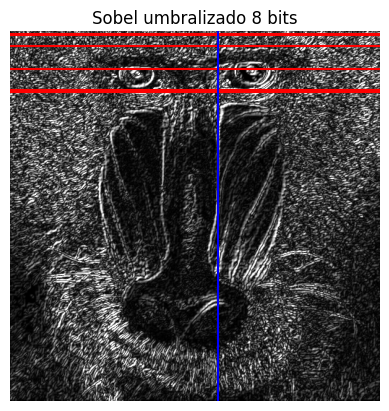

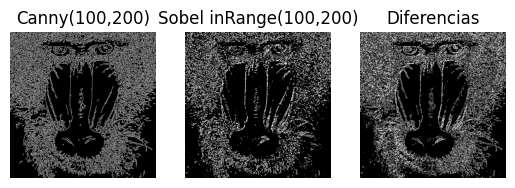

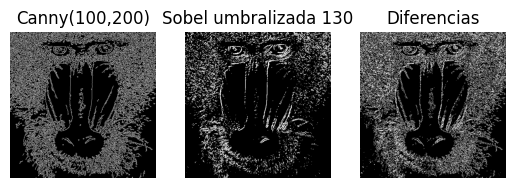

In [ ]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)
sobel = cv2.convertScaleAbs(sobel)
#Define valor umbral
valorUmbral = 130 
#Obtiene imagen umbralizada para dicho valor definido
_, imagenUmbralizada = cv2.threshold(sobel, valorUmbral, 255, cv2.THRESH_BINARY)

def get_10_percent_bigger(counts):
    bigger_with_border = np.max(counts[0])
    bigger_with_borders = []
    treshold = 0.9 * bigger_with_border
    for i in range(len(counts[0])):
        if counts[0][i] >= treshold:
            bigger_with_borders.append(i)
    print(f"Número máximo de píxeles blancos", bigger_with_border)
    print(f"Número de pixeles con al menos el 90% de píxeles blancos:", bigger_with_borders.__len__())
    return bigger_with_borders

print("columnas:")
col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
bigger_cols_with_border = get_10_percent_bigger(col_counts)

print("filas:")
row_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
row_counts = row_counts.transpose()
bigger_rows_with_border = get_10_percent_bigger(row_counts)

plt.axis("off")
plt.imshow(sobel, cmap='gray')
for r in bigger_rows_with_border:
    plt.axhline(y=r, color='r', linestyle='-')
for c in bigger_cols_with_border:
    plt.axvline(x=c, color='b', linestyle='-')
plt.title('Sobel umbralizado 8 bits')
plt.show()

sobel_umbralizado = cv2.inRange(sobel, 100, 200) 
sobel_umbralizado = cv2.convertScaleAbs(sobel_umbralizado)

#Comparación 1
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(canny, cmap='gray')
plt.title('Canny(100,200)')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(sobel_umbralizado, cmap='gray')
plt.title('Sobel inRange(100,200)')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Diferencias')
plt.imshow(cv2.absdiff(canny,sobel_umbralizado), cmap='gray')
plt.show() 

#Comparación 2
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(canny, cmap='gray')
plt.title('Canny(100,200)')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(imagenUmbralizada, cmap='gray')
plt.title('Sobel umbralizada 130')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Diferencias')
plt.imshow(cv2.absdiff(canny,sobel_umbralizado), cmap='gray')
plt.show() 




Tarea3: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, permita cambiar de modo, incluyendo al menos dos procesamientos diferentes como resultado de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [ ]:
from enum import Enum
import cv2  
import numpy as np

vid = cv2.VideoCapture(0)
ret, frame = vid.read()


#Marca de inicio
ret, frame = vid.read()
pframe_dif_list = [frame.copy()]
canny = frame.copy()

count = 0
wait_value = 1
selected_mode = 0
second_treshold_selected = False
first_treshold = 100
second_treshold = 200

class Keyboard(Enum):
    D = 100
    A = 97
    W = 119
    S = 115
    Q = 113
    ESC = 27

class Mode(Enum):
    DIFFERENCE = 0
    CANNY = 1

def handle_difference_mode(key):
    global wait_value
    if key == Keyboard.W.value:
        wait_value = min(20, wait_value + 1)
    elif key == Keyboard.S.value:
        wait_value = max(1, wait_value - 1)

def handle_canny_mode(key):
    global first_treshold, second_treshold, second_treshold_selected
    if key == Keyboard.Q.value:
        second_treshold_selected = not second_treshold_selected

    if second_treshold_selected:
        if key == Keyboard.W.value:
            second_treshold = min(500, second_treshold + 1)
        elif key == Keyboard.S.value:
            second_treshold = max(1, second_treshold - 1)
    else:
        if key == Keyboard.W.value:
            first_treshold = min(500, first_treshold + 1)
        elif key == Keyboard.S.value:
            first_treshold = max(1, first_treshold - 1)

def handle_key(key):
    global selected_mode

    match key:
        case Keyboard.D.value:      # switch to Canny mode
            selected_mode = Mode.CANNY.value
        case Keyboard.A.value:      # switch to Difference mode
            selected_mode = Mode.DIFFERENCE.value
        case Keyboard.ESC.value:    # exit
            return Keyboard.ESC.value
        case _:                     # cualquier otra tecla
            if selected_mode == Mode.DIFFERENCE.value:
                handle_difference_mode(key)
            elif selected_mode == Mode.CANNY.value:
                handle_canny_mode(key)
    return None

def set_to_difference_mode():
    image = cv2.absdiff(frame, pframe_dif_list[-wait_value])        
    cv2.putText(image, f'Wait: {wait_value}', (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,0), 2)
    return image

def set_to_canny_mode():
    global frame, first_treshold, second_treshold
    canny = cv2.Canny(frame, first_treshold, second_treshold)
    image = cv2.cvtColor(canny, cv2.COLOR_GRAY2BGR)
    return canny, image

def draw_line_by_intensity(canny, image):
    col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
    row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
    row_counts = row_counts.transpose()
    
    biggest_row_with_border = np.max(row_counts[0])
    biggest_col_with_border = np.max(col_counts[0])

    for r in range(len(row_counts[0])):
        if row_counts[0][r] >= 0.9 * biggest_row_with_border:
            cv2.line(image, (0, r), (canny.shape[1], r), (0, 0, 255), 1)
    for c in range(len(col_counts[0])):
        if col_counts[0][c] >= 0.9 * biggest_col_with_border:
            cv2.line(image, (c, 0), (c, canny.shape[0]), (255, 0, 0), 1)

def draw_histogram(image):
    hist_height = image.shape[0]
    cols = col_counts[0] / 255
    points = []
    for x, h in enumerate(cols):
        points.append((int(x), int(h)))

    rows = row_counts[0] / 255
    for x, h in enumerate(rows):
        points.append((int(h), int(x)))
    
    cv2.polylines(image, [np.array(points)], isClosed=False, color=(0,255,255), thickness=1)

def update_target(image):
    global first_treshold, second_treshold
    cv2.putText(image, f'First treshold: {first_treshold}', (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,155,0) if second_treshold_selected else (0,255,0), 2)
    cv2.putText(image, f'Second treshold: {second_treshold}', (10,60), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,155,0) if not second_treshold_selected else (0,255,0), 2)

while(True):      
    if wait_value > 20 or wait_value < 1:
        wait_value = 1
    # fotograma a fotograma
    ret, frame = vid.read()
    count += 1

    if ret:
        if selected_mode == Mode.DIFFERENCE.value:
            image = set_to_difference_mode()
        else:
            canny, image = set_to_canny_mode()
            # Draw lines
            draw_line_by_intensity(canny, image)
            # Draw histogram
            draw_histogram(image)
            update_target(image)

        cv2.putText(image, f'switch types: "A/D", change value "W/S", change value type "Q"', (10,450), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 1)
        # Muestra resultado
        cv2.imshow('Diferencia', image)

        #Copia fotograma actual para la diferencia en el siguiente forograma
        if pframe_dif_list.__len__() == 20:
            pframe_dif_list.pop(0)
        pframe_dif_list.append(frame.copy())
    
    # Detenemos pulsado ESC
    # Y manejamos los otros casos (a, w, s, d, q)
    key = cv2.waitKey(20)
    result = handle_key(key)
    if result == Keyboard.ESC.value:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Tarea 4: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

Respuesta 1:

In [ ]:
from enum import Enum
import cv2  
import numpy as np

vid = cv2.VideoCapture(0)

class Color(Enum):
    RED = 2
    BLUE = 0
    GREEN = 1

ret, frame = vid.read()
saved = frame.copy()

saved[:] = 0
blue_frame = saved.copy()
red_frame = saved.copy()

while(True):      
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo sobre la entrada
        framem=cv2.flip(frame, 1)

        # blue
        treshold = 150
        substract = 30
        blue = framem[:,:,Color.BLUE.value] > treshold
        green = framem[:,:,Color.GREEN.value] < treshold - substract
        red = framem[:,:,Color.RED.value] < treshold - substract
        saved[blue & red  & green] = 255

        # red
        treshold = 180
        substract = 50
        blue = framem[:,:,Color.BLUE.value] < treshold - substract
        red = framem[:,:,Color.RED.value] > treshold
        green = framem[:,:,Color.GREEN.value] < treshold - substract
        saved[blue & red  & green] = 0

        cv2.imshow('Diferencia', saved)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

Respuesta 2:

In [ ]:
vid = cv2.VideoCapture(0)

# Fondo
# Inicializa la sustracción del fondo con mezcla de gaussianas y detección de sombras
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=100, detectShadows=True)

def get_rectangle_point(img, prev, min_pixels=100):
    ys, xs = np.where(img == 255)
    if len(xs) > min_pixels and len(ys) > min_pixels:
        min_x = np.min(xs)
        min_y = np.min(ys)
        max_x = np.max(xs)
        max_y = np.max(ys)
        point1 = (min_x, min_y)
        point2 = (max_x, max_y)
        return point1, point2
    else:
        return prev[0], prev[1]

prev = [(0,0),(0,0)]

while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        # Aplica efecto espejo sobre la entrada
        framem=cv2.flip(frame, 1)
        
        #Con un segundo parámerto se puede definir máscara con zonas a actualizar
        objetos = eliminadorFondo.apply(framem)

        point1, point2 = get_rectangle_point(objetos, prev)
        prev = [point1,point2]
        objetos = cv2.cvtColor(objetos, cv2.COLOR_GRAY2BGR)
        cv2.rectangle(framem, point1, point2, (0,0,255), -1)

        cv2.imshow('webcam', framem)
   
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()